<a href="https://colab.research.google.com/github/OkotOlaa/Food-Sales-Prediction/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filename = '/content/sales_predictions (2).csv'

In [2]:
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#How many rows and columns?
df.shape

(8523, 12)

In [4]:
#What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#Are there duplicates? If so, drop any duplicates.
df_new = df.drop_duplicates()
df_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#Identify missing values
df_new.isna().head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#Decide on how to address the missing values and do it!
#outlet size - I used the mode
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [9]:
df['Outlet_Size'].fillna('Medium', inplace=True)


In [10]:
#item_weight
#Item weight is abit sensitive to impute, so i will add a new category to show missing
df['Item_Weight'].fillna('Missing', inplace=True)



In [11]:
#Confirm that there are no missing values after addressing them
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#Find and fix any inconsistent categories of data
#Item_Fat_Content
df_new['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df_new['Item_Fat_Content'] = df_new['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_new['Item_Fat_Content'] = df_new['Item_Fat_Content'].replace('LF', 'Low Fat')
df_new['Item_Fat_Content'] = df_new['Item_Fat_Content'].replace('reg', 'Regular')
df_new['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
#For any numerical columns, obtain the summary statistics of each
summary_stats = df.describe()
summary_stats

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [15]:
min_max_mean = summary_stats.loc[['min', 'max', 'mean']]
min_max_mean

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,0.000000,31.290000,1985.000000,33.290000
max,0.328391,266.888400,2009.000000,13086.964800
mean,0.066132,140.992782,1997.831867,2181.288914


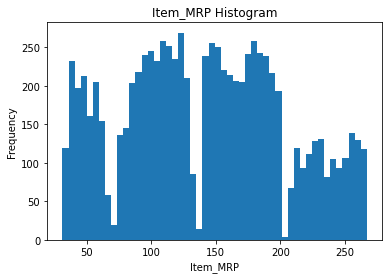

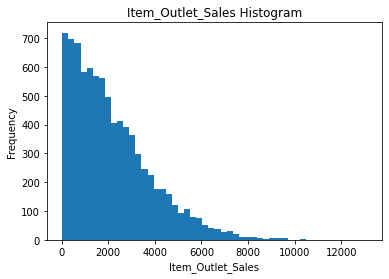

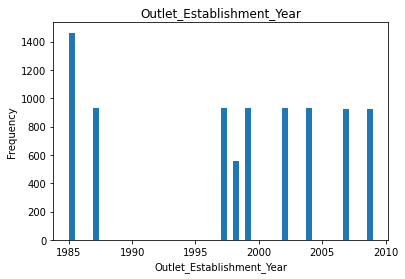

In [26]:
#Histogram to view the distributions of various features in your dataset.

import matplotlib.pyplot as plt

# Plot histograms for 'Item_MRP' and 'Item_Outlet_Sales' columns
df['Item_MRP'].plot(kind='hist', bins=50)
plt.title('Item_MRP Histogram')
plt.xlabel('Item_MRP')
plt.ylabel('Frequency')
plt.show()

# Plot histograms for 'Item_Outlet_Sales' columns
df['Item_Outlet_Sales'].plot(kind='hist', bins=50)
plt.title('Item_Outlet_Sales Histogram')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

# Plot histograms for 'Outlet_Establishment_Year'columns
df['Outlet_Establishment_Year'].plot(kind='hist', bins=50)
plt.title('Outlet_Establishment_Year')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Frequency')
plt.show()


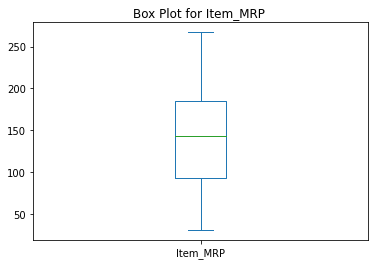

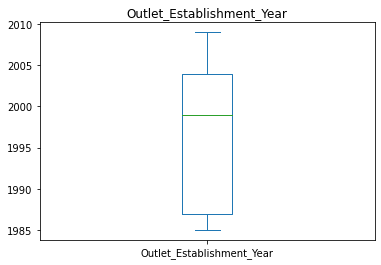

In [27]:
#Boxplot to view statistical summaries of various features in your dataset.
import pandas as pd
import matplotlib.pyplot as plt

# Plot box plots for 'Item_MRP' and 'Item_Outlet_Sales' columns
df[['Item_MRP']].plot(kind='box')
plt.title('Box Plot for Item_MRP ')
plt.show()

# Plot box plots for Outlet_Establishment_Year
df[['Outlet_Establishment_Year']].plot(kind='box')
plt.title('Outlet_Establishment_Year')
plt.show()

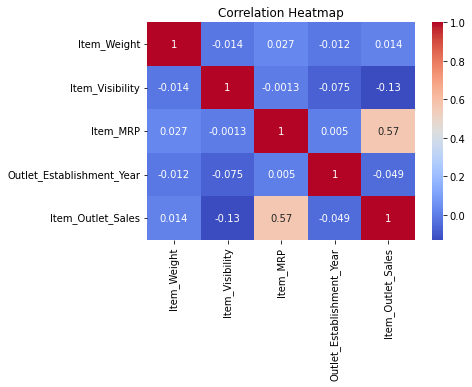

In [29]:
#Heatmap of the correlation between features.
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
